In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

import pandas as pd

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 

# define the submission/grader object for this exercise
#grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [2]:
def warmUpExercise():
    A = np.identity(5)
    return A

In [3]:
warmUpExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:

# # appends the implemented function in part 1 to the grader object
# grader[1] = warmUpExercise

# # send the added functions to coursera grader for getting a grade on this part
# grader.grade()


# 2) Linear Regression with one variable

Now you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file Data/ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss.

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables x and y

In [5]:
# Read comma separated data
data = np.loadtxt(os.path.join('questions_dataset', 'ex1data1.txt'), delimiter=',')
pd.DataFrame(data).head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
## Dependent and Independent features
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples
print(m)

97


In [7]:
def plotData(x, y):
    fig = plt.figure()  # open a new figure
    plt.plot(x, y, 'ro', ms=10, mec='k')
    
    plt.title("Profit vs Population in Cities")
    plt.xlabel("Population of City in 10,000s")
    plt.ylabel("Profit in $10,000")
    plt.show()
    

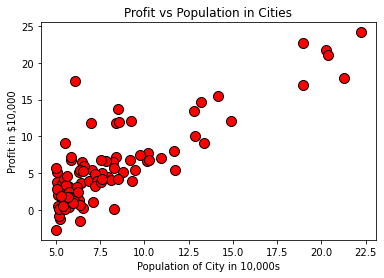

In [8]:
plotData(X, y)

<a id="section2"></a>
## 2.2 Gradient Descent

In this part, you will fit the linear regression parameters $\theta$ to our dataset using gradient descent.

### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-warning">
**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the intercept term ($\theta_0$), we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>


### 2.2.2 Implementation

We have already set up the data for linear regression. In the following cell, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Do NOT execute this cell more than once.

In [9]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.stack([np.ones(m), X], axis=1)
pd.DataFrame(X).head()

,0,1
0,1.0,6.1101
1,1.0,5.5277
2,1.0,8.5186
3,1.0,7.0032
4,1.0,5.8598


<a id="section2"></a>
### 2.2.3 Computing the cost $J(\theta)$

As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Your next task is to complete the code for the function `computeCost` which computes $J(\theta)$. As you are doing this, remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.
<a id="computeCost"></a>

In [10]:
def computeCost(X, y, theta):
       
    # initialize some useful values
    m = y.size  # number of training examples
    
    # You need to return the following variables correctly
    h_theta_x = np.dot(X,theta)  ## hypothesis function
    j_theta_x = (1/(2*m)) * np.sum(np.square(h_theta_x - y))  ## cost function

    return j_theta_x

Once you have completed the function, the next step will run computeCost two times using two different initializations of  𝜃 . You will see the cost printed to the screen.

In [11]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = ',J)
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = ',J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed =  32.072733877455676
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed =  54.24245508201238
Expected cost value (approximately) 54.24


<img src = 'images/2.jpg'>
<img src = 'images/1.jpg'>

In [12]:
## Submitting the assignment
# grader[2] = computeCost
# grader.grade()

<a id="section3"></a>
### 2.2.4 Gradient descent

Next, you will complete a function which implements gradient descent.
The loop structure has been written for you, and you only need to supply the updates to $\theta$ within each iteration. 

As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. [Refer to the equations in this notebook](#section2) and to the video lectures if you are uncertain. A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

<div class="alert alert-box alert-warning">
**Vectors and matrices in `numpy`** - Important implementation notes

A vector in `numpy` is a one dimensional array, for example `np.array([1, 2, 3])` is a vector. A matrix in `numpy` is a two dimensional array, for example `np.array([[1, 2, 3], [4, 5, 6]])`. However, the following is still considered a matrix `np.array([[1, 2, 3]])` since it has two dimensions, even if it has a shape of 1x3 (which looks like a vector).

Given the above, the function `np.dot` which we will use for all matrix/vector multiplication has the following properties:
- It always performs inner products on vectors. If `x=np.array([1, 2, 3])`, then `np.dot(x, x)` is a scalar.
- For matrix-vector multiplication, so if $X$ is a $m\times n$ matrix and $y$ is a vector of length $m$, then the operation `np.dot(y, X)` considers $y$ as a $1 \times m$ vector. On the other hand, if $y$ is a vector of length $n$, then the operation `np.dot(X, y)` considers $y$ as a $n \times 1$ vector.
- A vector can be promoted to a matrix using `y[None]` or `[y[np.newaxis]`. That is, if `y = np.array([1, 2, 3])` is a vector of size 3, then `y[None, :]` is a matrix of shape $1 \times 3$. We can use `y[:, None]` to obtain a shape of $3 \times 1$.
<div>
<a id="gradientDescent"></a>

In [13]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    
    # make a copy of theta, to avoid changing the original array, since numpy arrays are passed by reference to functions
    theta = theta.copy()
    
    # Use a python list to save cost in every iteration
    J_history = [] 
    
    for i in range(num_iters):
        h_theta_x = np.dot(X,theta)  ## hypothesis function
        theta     = theta - (alpha/m) * np.dot((h_theta_x - y),X)
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

After you are finished call the implemented gradientDescent function and print the computed  𝜃 . We initialize the  𝜃  parameters to 0 and the learning rate  𝛼  to 0.01. Execute the following cell to check your code.

In [14]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


We will use your final parameters to plot the linear fit. The results should look like the following figure.

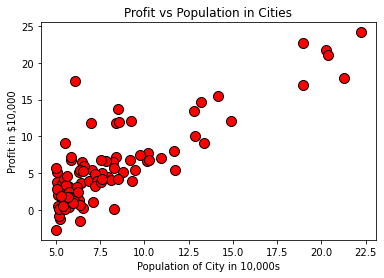

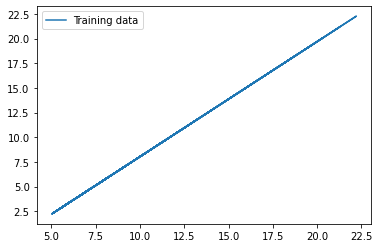

In [15]:
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);